<a href="https://colab.research.google.com/github/jlmarrugom/covid/blob/main/Murcielagos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Base de Datos de Murcielagos

### Lectura y Corrección de Datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium  #needed for interactive map
from folium.plugins import HeatMap

In [ ]:
bats = pd.read_excel('/content/drive/MyDrive/Covid UC/Base de datos murcielagos Córdoba_Dic 2020.xlsx',sheet_name='Datos')
bats['Conteo'] = 1
bats.head()

,Nro.,Cód.,Fecha de toma de muestra,Lugar,Coordenadas,Urb/Rural,Especie,Sexo,Conteo
0,1,1,2020-09-22,Sahagun,NaN,Urbano,Glossophaga soricina,Macho,1
1,2,2,2020-09-22,Sahagun,NaN,Urbano,Artibeus planirostris,Hembra,1
2,3,3,2020-09-22,Sahagun,NaN,Urbano,Artibeus planirostris,Macho,1
3,4,4,2020-09-22,Sahagun,NaN,Urbano,Artibeus planirostris,Macho,1
4,5,5,2020-09-22,Sahagun,NaN,Urbano,Artibeus planirostris,Hembra,1


In [ ]:
bats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Nro.                       131 non-null    int64         
 1   Cód.                       131 non-null    int64         
 2   Fecha de  toma de muestra  131 non-null    datetime64[ns]
 3   Lugar                      131 non-null    object        
 4   Coordenadas                0 non-null      float64       
 5   Urb/Rural                  131 non-null    object        
 6   Especie                    131 non-null    object        
 7   Sexo                       131 non-null    object        
 8   Conteo                     131 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 9.3+ KB


In [ ]:
bats['Urb/Rural'].value_counts()

Urbano     64
Urbano     54
Rural      13
Name: Urb/Rural, dtype: int64

In [ ]:
bats['Urb/Rural'] = bats['Urb/Rural'].replace({'Urbano ':'Urbano'})
bats['Urb/Rural'].value_counts()

Urbano    118
Rural      13
Name: Urb/Rural, dtype: int64

In [ ]:
#@title Georeferenciación
bats['lat']=0
bats['lon']=0
bats['lat'].loc[bats['Lugar']=='Lorica'] = 9.2394583
bats['lon'].loc[bats['Lugar']=='Lorica'] = -75.8139786

bats['lat'].loc[bats['Lugar']=='Planeta Rica'] = 8.4076739 
bats['lon'].loc[bats['Lugar']=='Planeta Rica'] = -75.5840456 

bats['lat'].loc[bats['Lugar']=='Tierralta'] = 8.1717342
bats['lon'].loc[bats['Lugar']=='Tierralta'] = -76.059376

bats['lat'].loc[bats['Lugar']=='Sahagun'] = 8.9472964
bats['lon'].loc[bats['Lugar']=='Sahagun'] = -75.4434972

bats['lat'].loc[bats['Lugar']=='Montelibano'] = 7.9800534
bats['lon'].loc[bats['Lugar']=='Montelibano'] = -75.4167198

bats['lat'].loc[bats['Lugar']=='Cereté'] = 8.8852282
bats['lon'].loc[bats['Lugar']=='Cereté'] = -75.7922421

bats['lat'].loc[bats['Lugar']=='San Antero'] = 9.373016
bats['lon'].loc[bats['Lugar']=='San Antero'] = -75.7595056

bats['lat'].loc[bats['Lugar']=='Montería'] = 8.7558921
bats['lon'].loc[bats['Lugar']=='Montería'] = -75.887029

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### Resultados del Análisis

In [ ]:
bats[['Especie','Urb/Rural','Sexo','Lugar']].groupby(['Lugar']).agg(lambda x:x.value_counts().index[0])

,Especie,Urb/Rural,Sexo
Lugar,,,
Cereté,Artibeus planirostris,Urbano,Macho
Lorica,Artibeus planirostris,Urbano,Hembra
Montelibano,Artibeus planirostris,Urbano,Macho
Montería,Artibeus planirostris,Urbano,Macho
Planeta Rica,Artibeus planirostris,Urbano,Hembra
Sahagun,Artibeus planirostris,Urbano,Macho
San Antero,Artibeus planirostris,Urbano,Macho
Tierralta,Artibeus planirostris,Rural,Macho


*La especie más común de Murcielagos por Lugar es la Artibeus planirostris, y el sexo Masculino. Los muestreos se hicieron mayoritariamente en entornos Urbanos. En planeta Rica se encontrarón más murcielagos con sexo femenino, y en Tierralta la mayoría de los muestreos se hicieron en entornos Rurales*

Text(0.5, 1.0, 'Cantidad de Murcielagos por Lugar')

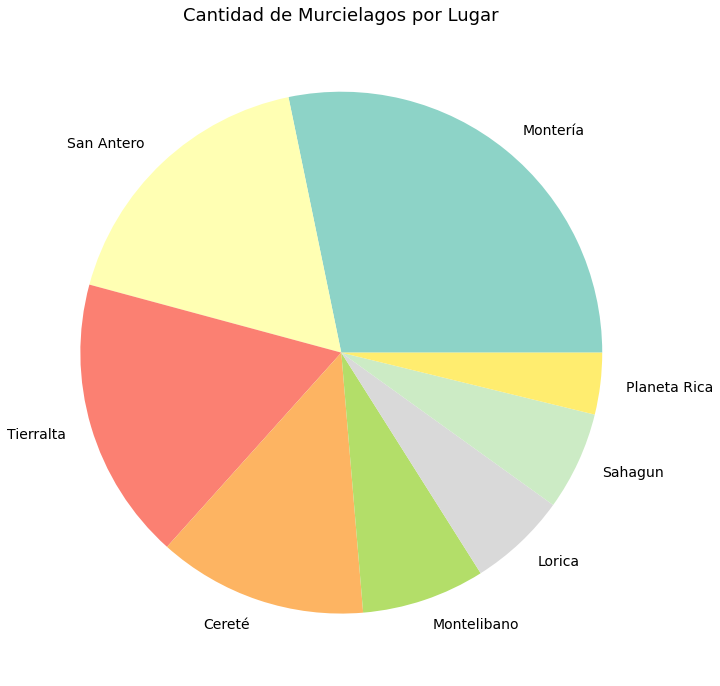

In [ ]:
bats[['Conteo','Lugar']].groupby(['Lugar']).sum().sort_values(by='Conteo',ascending=False).plot(kind='pie',y='Conteo', figsize=(12,12),colormap='Set3',fontsize=14,legend=False,ylabel='')
plt.title('Cantidad de Murcielagos por Lugar',fontdict={'fontsize':18})

*La mayor variedad en especies de murcielagos se encontró en Montería, seguida de Tierralta y San Antero.*

In [ ]:
bats[['Especie','Urb/Rural','Sexo','Lugar']].groupby(['Especie']).agg(lambda x:x.value_counts().index[0])

,Urb/Rural,Sexo,Lugar
Especie,,,
Artibeus lituratus,Urbano,Macho,San Antero
Artibeus planirostris,Urbano,Macho,Montería
Carollia perspicillata,Urbano,Macho,Montelibano
Desmodus rotundus,Urbano,Macho,San Antero
Glossophaga soricina,Urbano,Hembra,Montería
Molossus molossus,Urbano,Macho,Tierralta
Myotis nigricans,Urbano,Hembra,Planeta Rica
Noctilio alvibentris,Urbano,Macho,Montería
Phillostomus discolor,Urbano,Macho,Montería


*Podemos ver la mayor representación que tuvo cada especie.*

Text(0.5, 1.0, 'Cantidad de Murcielagos por Especie')

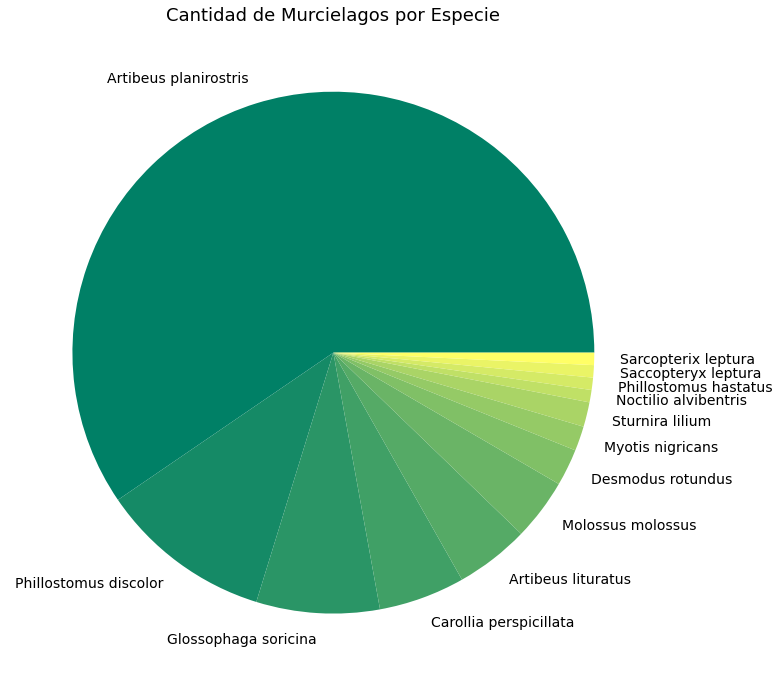

In [ ]:
bats[['Conteo','Especie']].groupby(['Especie']).sum().sort_values(by='Conteo',ascending=False).plot(kind='pie',y='Conteo', figsize=(12,12),colormap='summer',fontsize=14,legend=False,ylabel='')
plt.title('Cantidad de Murcielagos por Especie',fontdict={'fontsize':18})

*Las 3 especies más comunes encontradas fueron:*

*1. Artibeus planirostris.*

*2. Phillostomus discolor.*

*3. Glossophaga soricina.*


In [ ]:
bats[['Especie','Urb/Rural','Sexo','Lugar']].groupby(['Urb/Rural']).agg(lambda x:x.value_counts().index[0])

,Especie,Sexo,Lugar
Urb/Rural,,,
Rural,Artibeus planirostris,Macho,Tierralta
Urbano,Artibeus planirostris,Macho,Montería


*Tanto en entornos Rurales como Urbanos la especie más común es el Artibeus planirostris, el sexo más común es el masculino*

Text(0.5, 1.0, 'Cantidad de Murcielagos por Entorno')

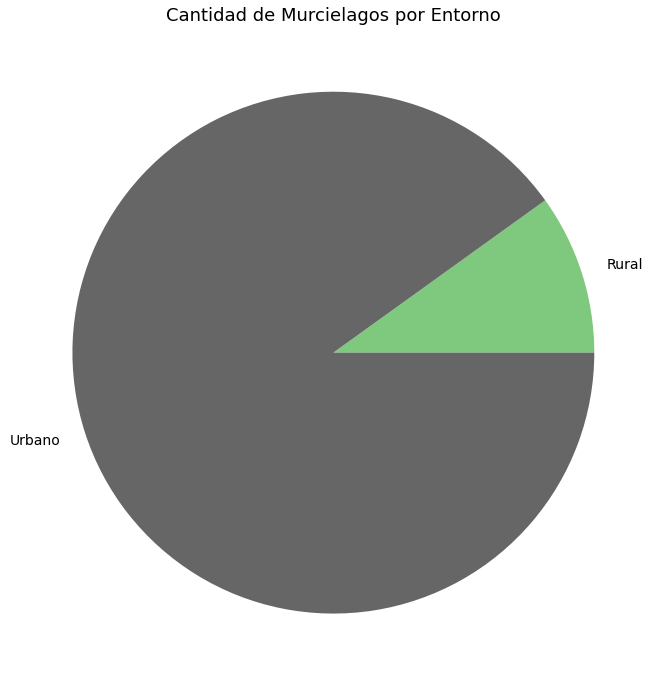

In [ ]:
bats[['Conteo','Urb/Rural']].groupby(['Urb/Rural']).sum().sort_values(by='Conteo',ascending=True).plot(kind='pie',y='Conteo', figsize=(12,12),colormap='Accent',fontsize=14,legend=False,ylabel='')
plt.title('Cantidad de Murcielagos por Entorno',fontdict={'fontsize':18})

*Los muestreos fueron en areas Urbanas mayoritariamente.*

In [ ]:
bats[['Especie','Urb/Rural','Sexo','Lugar']].groupby(['Sexo']).agg(lambda x:x.value_counts().index[0])

,Especie,Urb/Rural,Lugar
Sexo,,,
Hembra,Artibeus planirostris,Urbano,Montería
Macho,Artibeus planirostris,Urbano,Montería


*En Montería, entornos Urbanos, la especie Artibeus planirostris fueron las caracteristicas más representativas que compartían tanto machos como hembras.*

Text(0.5, 1.0, 'Cantidad de Murcielagos por Sexo')

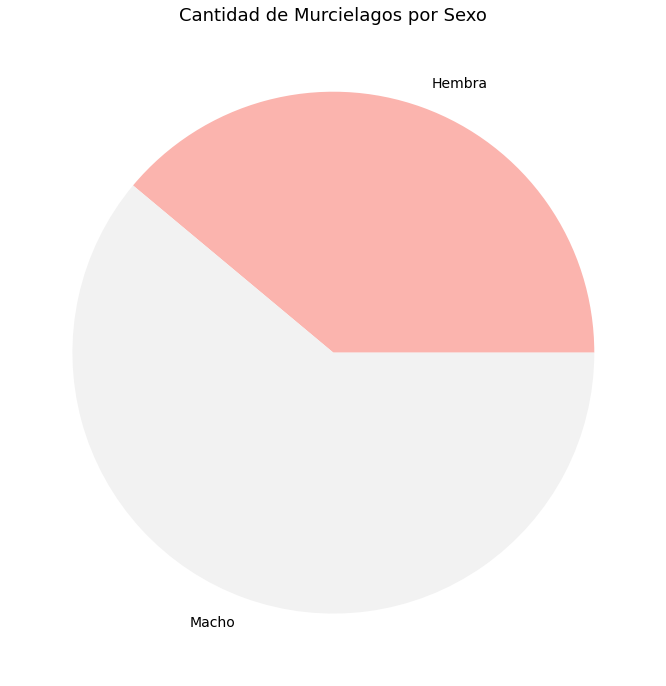

In [ ]:
bats[['Conteo','Sexo']].groupby(['Sexo']).sum().sort_values(by='Conteo',ascending=True).plot(kind='pie',y='Conteo', figsize=(12,12),colormap='Pastel1',fontsize=14,legend=False,ylabel='')
plt.title('Cantidad de Murcielagos por Sexo',fontdict={'fontsize':18})

*La mayoría de Murcielagos recolectados tuvo Sexo Marculino*

In [ ]:
df = bats.copy(deep=True)
# max_amount = float(df['export_val'].max())
df = df[['lat','lon','Lugar']].groupby('Lugar').max()

df = df.merge(bats[['Especie','Lugar']].groupby(['Lugar']).agg(lambda x:x.value_counts().index[0]) ,how='inner',on='Lugar')
df = df.merge(bats[['Sexo','Lugar']].groupby(['Lugar']).agg(lambda x:x.value_counts().index[0]) ,how='inner',on='Lugar')
df = df.merge(bats[['Conteo','Lugar']].groupby(['Lugar']).sum(),how='inner',on='Lugar')


#df = df.merge(bats[['RESULTADO PCR','Lugar']].loc[bats['RESULTADO PCR']=='POSITIVO'].groupby(['Lugar']).agg(lambda x:x.value_counts().index[0])

df = df.reset_index()
df

,Lugar,lat,lon,Especie,Sexo,Conteo
0,Cereté,8.885228,-75.792242,Artibeus planirostris,Macho,17
1,Lorica,9.239458,-75.813979,Artibeus planirostris,Hembra,8
2,Montelibano,7.980053,-75.416720,Artibeus planirostris,Macho,10
3,Montería,8.755892,-75.887029,Artibeus planirostris,Macho,37
4,Planeta Rica,8.407674,-75.584046,Artibeus planirostris,Hembra,5
5,Sahagun,8.947296,-75.443497,Artibeus planirostris,Macho,8
6,San Antero,9.373016,-75.759506,Artibeus planirostris,Macho,23
7,Tierralta,8.171734,-76.059376,Artibeus planirostris,Macho,23


In [ ]:
#@title #Conteo por Municipio
folium_hmap = folium.Figure(width=1000, height=500)
m = folium.Map(location=[8.3344713,-75.6666238],
                         width='100%',
                         height='100%',
                         zoom_start=8,#Por defecto es 10
                         tiles="OpenStreetMap").add_to(folium_hmap)

#folium_hmap.fit_bounds([[6.4, -78], [10.4, -73]])
data = df
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=str(data.iloc[i]['Lugar'])+
      '\nTotal de Murcielagos Recolectados: \n'+
      str(data.iloc[i]['Conteo'])+
      '\nEspecie más Común: \n'+
      str(data.iloc[i]['Especie'])+
      '\nSexo más Común: \n'+
      str(data.iloc[i]['Sexo']),
      radius=float(data.iloc[i]['Conteo'])*400,
      color='purple',
      fill=True,
      fill_color='purple'
   ).add_to(m)

folium_hmap